Dataset Description:

In this project, we are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this project,we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [261]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [262]:
#Loading the dataset
df=pd.read_csv('insurance_fraud.csv')

In [263]:
pd.set_option('display.max_columns',None)

In [264]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [265]:
df.shape

(1000, 40)

Rows-->1000

Columns-->40

In [266]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [267]:
#Checking for the null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Null values are not present except in the last column '_c39'.

'_c39' column is of no use,so we can drop it.

EDA:

In [268]:
df.drop(['_c39'],axis=1,inplace=True)

In [269]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [270]:
#'fraud_reported'is ordinal categorical type,so we can perform LabelEncoder
df.replace({'N':0,'Y':1},inplace=True)

In [271]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [272]:
#Filling ? values,replace the values with mode
df['collision_type']=df['collision_type'].replace('?','Rear Collision')

In [273]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [274]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [275]:
#Filling ? values,replace the values with mode
df['property_damage']=df['property_damage'].replace('?','NO')

In [276]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [277]:
#Filling ? values,replace the values with mode
df['police_report_available']=df['police_report_available'].replace('?','NO')

In [278]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [279]:
# let's extrat days, month and year from policy bind date

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [280]:
# let's check the correlation of authorities_contacted with the target

df[['auto_model','fraud_reported']].groupby(['auto_model'], as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
38,X6,0.437500
32,Silverado,0.409091
24,ML350,0.400000
7,C300,0.388889
34,Tahoe,0.375000
14,F150,0.370370
10,Civic,0.363636
5,A5,0.343750
22,M5,0.333333
30,RAM,0.325581


In [281]:
#let's perform target encoding for auto make

df['auto_make'] = df['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
            'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.05,0.08, 0.10,0.12,0.13,0.13,0.14,0.15,0.15,0.16,0.16,0.19,0.20,0.20,0.22,0.23,0.24,0.25,0.26,
                 0.27,0.27,0.27,0.29,0.29,0.29,0.29,0.29,0.30,0.30,0.32,0.33,0.34,0.36,0.37,0.38,0.39,0.40,0.41,0.44))

# let's check the values
# df['auto_make'].value_counts()

In [282]:
# let's check the correlation auto make with the target

df[['auto_make','fraud_reported']].groupby(['auto_make'], as_index = False).mean().sort_values(by='fraud_reported', ascending = False)

,auto_make,fraud_reported
8,Mercedes,0.338462
5,Ford,0.305556
1,Audi,0.304348
13,Volkswagen,0.279412
2,BMW,0.277778
3,Chevrolet,0.276316
6,Honda,0.254545
4,Dodge,0.250000
11,Suburu,0.237500
10,Saab,0.225000


In [283]:
# let's perform target encoding for auto make

df['auto_make'] = df['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.16,0.18,0.19,0.19,0.23,0.24,0.25,0.25,0.28,0.28,0.28,0.30,0.31,0.34))

# let's check the values
# df['auto_make'].value_counts()

In [284]:
# let's check the correlation of authorities_contacted with the target

df[['police_report_available','fraud_reported']].groupby(['police_report_available'], as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
0,NO,0.255102
1,YES,0.229299


In [285]:
# let's perform target encoding for property damage

df['police_report_available'] = df['police_report_available'].replace(('NO','YES'),(0.26,0.23))

# let's check the values
# df['police_report_available'].value_counts()

In [286]:
# let's check the correlation of authorities_contacted with the target

df[['property_damage','fraud_reported']].groupby(['property_damage'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
1,YES,0.258278
0,NO,0.242120


In [287]:
# let's perform target encoding for property damage

df['property_damage'] = df['property_damage'].replace(('NO','YES'),(0.24,0.26))

# let's check the values
# df['property_damage'].value_counts()

In [288]:
# let's check the correlation of authorities_contacted with the target

df[['incident_city','fraud_reported']].groupby(['incident_city'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
0,Arlington,0.289474
1,Columbus,0.261745
2,Hillsdale,0.248227
6,Springfield,0.242038
3,Northbend,0.234483
5,Riverwood,0.223881
4,Northbrook,0.221311


In [289]:
# let's do target encoding for incident city

df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.22,0.22,0.23,0.24,0.25,0.26,0.29))

# let's check the values
# df['incident_city'].value_counts()

In [290]:
# let's check the correlation of authorities_contacted with the target

df[['incident_state','fraud_reported']].groupby(['incident_state'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
2,OH,0.434783
0,NC,0.309091
4,SC,0.294355
3,PA,0.266667
5,VA,0.227273
1,NY,0.221374
6,WV,0.179724


In [291]:
# let's perform target encoding for incident state

df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.18,0.22,0.22,0.27,0.29,0.31,0.43))

# checking the values
# df['incident_state'].value_counts()

In [292]:
# let's check the correlation of authorities_contacted with the target

df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
3,Other,0.318182
0,Ambulance,0.290816
1,Fire,0.269058
4,Police,0.208904
2,None,0.065934


In [293]:
# let's perform target encoding for authorities contacted

df['authorities_contacted'] = df['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                    (0.07,0.21,0.27,0.29,0.32))

# let's check the values
#df['authorities'].value_counts()

In [294]:
# let's check the correlation of incident_severity with the target

df[['incident_severity','fraud_reported']].groupby(['incident_severity'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
0,Major Damage,0.605072
2,Total Loss,0.128571
1,Minor Damage,0.107345
3,Trivial Damage,0.066667


In [295]:
# let's perform target encoding for incident severity

df['incident_severity'] = df['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.94,0.89,0.87,0.39))

# let's check the values
# df['incident_severity'].value_counts()

In [296]:
# let's check the correlation of collision_type with the target

df[['collision_type','fraud_reported']].groupby(['collision_type'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
0,Front Collision,0.275591
2,Side Collision,0.253623
1,Rear Collision,0.227660


In [297]:
# let's perform target encoding for collision type

df['collision_type'] = df['collision_type'].replace(('Rear Collision', 'Side Collision', 'Front Collision'),
                                                        (0.23,0.25,0.28))

# let's check the values of collision type
# df['collision_type'].value_counts()

In [298]:
# let's check the correlation of incident_type with the target

df[['incident_type','fraud_reported']].groupby(['incident_type'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
2,Single Vehicle Collision,0.290323
0,Multi-vehicle Collision,0.272076
1,Parked Car,0.095238
3,Vehicle Theft,0.085106


In [299]:
# let's perform target encoding for incident type

df['incident_type'] = df['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.09, 0.1, 0.27,0.29))

# let's check the values
#df['incident_type'].value_counts()

In [300]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

# extracting days and month from date
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [301]:
# let's know the relation between insured_relationship and fraud reported

df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
2,other-relative,0.293785
5,wife,0.270968
1,not-in-family,0.258621
4,unmarried,0.241135
3,own-child,0.213115
0,husband,0.205882


In [302]:
# let's do target encoding for insured relationship

df['insured_relationship'] = df['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.21,0.21,0.24,0.26,0.27,0.29))

#df['insured-relationship'].value_counts()

In [303]:
# let's know the relation between insured_hobbies and fraud reported

df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
5,chess,0.826087
6,cross-fit,0.742857
19,yachting,0.301887
2,board-games,0.291667
14,polo,0.276596
15,reading,0.265625
0,base-jumping,0.265306
10,hiking,0.230769
13,paintball,0.228070
16,skydiving,0.224490


In [304]:
# let's perform target encoding for insured_hobbies

df['insured_hobbies'] = df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.09, 0.09,
                0.11, 0.12,0.16,0.16,0.18,0.19,0.20,0.20,0.22,0.23,0.23,0.27,0.27,0.29,0.30,0.69,0.74,0.83))

#df['insured_hobbies'].value_counts()

In [305]:
# let's know the relation between insured_occupation and fraud reported

df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
3,exec-managerial,0.368421
4,farming-fishing,0.301887
2,craft-repair,0.297297
13,transport-moving,0.291667
12,tech-support,0.282051
11,sales,0.276316
1,armed-forces,0.246377
6,machine-op-inspct,0.236559
10,protective-serv,0.222222
9,prof-specialty,0.211765


In [306]:
# let's perform target encoding for insured_occupation

df['insured_occupation'] = df['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.17, 0.17,0.17, 0.20,0.21,0.22,0.24,0.25,0.28,0.28,
                                                          0.29,0.30,0.30,0.37))
# df['insured_occupation'].value_counts()

In [307]:
# let's know the relation of insured_education_level with faud_reported

df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'],as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)


,insured_education_level,fraud_reported
6,PhD,0.264000
4,MD,0.263889
1,College,0.262295
3,JD,0.260870
0,Associate,0.234483
2,High School,0.225000
5,Masters,0.223776


In [308]:
# let's perform target encoding

df['insured_education_level'] = df['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.22,0.23,0.23,0.26,0.26,0.26,0.26))
#df['insured_education_level'].value_counts()

In [309]:
# lets know the relation of insured sex and fraud reported

df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
1,MALE,0.261339
0,FEMALE,0.234637


In [310]:
# target encoding for sex

df['insured_sex'] = df['insured_sex'].replace(('FEMALE','MALE'),(0.23,0.26))
#df['insured_sex'].value_counts()

In [311]:
# lets know the relation of policy state and fraud reported

df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
1,250/500,0.262108
0,100/300,0.257880
2,500/1000,0.216667


In [312]:
# target encoding for policy_csl

df['policy_csl'] = df['policy_csl'].replace(('500/1000','100/300','250/500'),(0.22,0.26,0.26))

# check the values
# df['policy_csl'].value_counts()

In [313]:
# lets know the relation of policy state and fraud reported

df[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
2,OH,0.258523
1,IN,0.254839
0,IL,0.227811


In [314]:
# target encoding for policy_state

df['policy_state'] = df['policy_state'].replace(('IL','IN','OH'),(0.23,0.25,0.26))

# check the values
# df['policy_state'].value_counts()

In [315]:
# let's delete unnecassary columns

df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [316]:
df.shape

(1000, 36)

In [317]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
0,328,48,0.26,0.26,1000,1406.91,0,466132,0.26,0.26,0.30,0.20,0.21,53300,0,0.29,0.25,0.39,0.21,0.29,0.26,5,1,0.26,1,2,0.23,71610,6510,13020,52080,0.23,2004,1,1,25
1,228,42,0.25,0.26,2000,1197.22,5000000,468176,0.26,0.26,0.24,0.27,0.29,0,0,0.09,0.23,0.89,0.21,0.22,0.22,8,1,0.24,0,0,0.26,5070,780,780,3510,0.34,2007,1,1,21
2,134,29,0.26,0.26,2000,1413.14,5000000,430632,0.23,0.26,0.28,0.30,0.21,35100,0,0.27,0.23,0.89,0.21,0.22,0.26,7,3,0.24,2,3,0.26,34650,7700,3850,23100,0.25,2007,0,2,22
3,256,41,0.23,0.26,2000,1415.74,6000000,608117,0.23,0.26,0.25,0.30,0.24,48900,-62400,0.29,0.28,0.39,0.21,0.43,0.29,5,1,0.24,1,2,0.26,63400,6340,6340,50720,0.28,2014,1,10,1
4,228,44,0.23,0.22,1000,1583.91,6000000,610706,0.26,0.23,0.28,0.30,0.24,66000,-46000,0.09,0.23,0.89,0.07,0.22,0.29,20,1,0.24,0,1,0.26,6500,1300,650,4550,0.19,2009,0,2,17


In [318]:
#statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.50,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.00,44.000,64.00
policy_state,1000.0,2.467600e-01,1.265158e-02,0.23,0.2300,0.25,0.260,0.26
policy_csl,1000.0,2.480000e-01,1.833947e-02,0.22,0.2200,0.26,0.260,0.26
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.00,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.20,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.00,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.50,603251.000,620962.00
insured_sex,1000.0,2.438900e-01,1.496636e-02,0.23,0.2300,0.23,0.260,0.26
insured_education_level,1000.0,2.451300e-01,1.680671e-02,0.22,0.2300,0.26,0.260,0.26


In [319]:
#Checking the correlation 
df.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day
months_as_customer,1.000000,0.922098,0.001375,0.020886,0.026807,0.005018,0.015498,0.017895,0.060925,-0.021050,0.011485,0.013850,0.001881,0.006399,0.020209,0.043848,0.081134,-0.027492,0.018957,-0.036958,-0.015097,0.070639,0.014736,0.005488,-0.010162,0.058383,0.022146,0.062108,0.065329,0.034940,0.061013,0.050834,-0.000292,0.020544,0.024659,-0.011092
age,0.922098,1.000000,-0.017646,0.014666,0.029188,0.014404,0.018126,0.025604,0.073337,0.001543,-0.014512,0.025395,0.008486,-0.007075,0.007368,0.045676,0.096295,-0.032808,0.018358,-0.033866,-0.009072,0.087161,0.022102,-0.003408,-0.015679,0.052359,0.020441,0.069863,0.075522,0.060898,0.062588,0.046113,0.001354,0.012143,0.023404,-0.006131
policy_state,0.001375,-0.017646,1.000000,0.020363,0.001376,0.011763,-0.031090,0.012989,-0.017427,-0.001783,-0.007317,-0.020485,-0.002845,0.074339,-0.039004,0.000694,-0.055100,-0.010570,-0.012525,0.017128,-0.012711,0.025001,-0.045944,0.001461,0.003288,0.024055,-0.067706,-0.004775,-0.042745,0.005576,0.002947,-0.006357,0.014516,0.031224,0.011560,0.021533
policy_csl,0.020886,0.014666,0.020363,1.000000,-0.004282,-0.011792,-0.003516,-0.000844,0.047702,0.102495,0.069180,-0.024369,0.012676,-0.002113,0.024967,0.044556,-0.014381,-0.030940,0.050159,0.014654,0.020261,0.004146,0.014357,0.021863,-0.009051,-0.048917,-0.033853,0.025580,0.050638,0.016558,0.018442,0.021741,0.039159,0.046045,-0.006597,0.015512
policy_deductable,0.026807,0.029188,0.001376,-0.004282,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.027968,0.011246,-0.021203,-0.008266,0.035212,-0.023544,-0.003388,0.045604,-0.007039,-0.030886,-0.001747,0.025154,0.060935,0.051214,0.015770,-0.022765,0.066639,-0.038036,0.022839,0.039107,0.064792,0.005269,-0.008113,0.026105,0.014817,-0.006418,-0.018160
policy_annual_premium,0.005018,0.014404,0.011763,-0.011792,-0.003245,1.000000,-0.006247,0.032354,0.038853,0.007158,-0.035601,0.008461,-0.022491,-0.013738,0.023547,0.022774,-0.009631,0.003854,0.020087,-0.065287,-0.058224,-0.001578,-0.045991,0.080738,0.026780,0.002332,-0.021998,0.009094,-0.017633,-0.011654,0.020246,-0.042704,-0.049226,-0.014480,0.021559,0.014835
umbrella_limit,0.015498,0.018126,-0.031090,-0.003516,0.010870,-0.006247,1.000000,0.019671,0.010688,0.024418,-0.018412,0.031742,0.005640,-0.047268,-0.024056,-0.045453,-0.014783,0.027677,-0.010942,0.019529,0.012403,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.007936,0.009893,0.058622,0.042409,-0.021716
insured_zip,0.017895,0.025604,0.012989,-0.000844,0.004545,0.032354,0.019671,1.000000,-0.036942,0.021688,0.042617,0.027988,0.038719,0.006303,0.049372,-0.051472,-0.005849,-0.015674,-0.025401,0.030087,-0.025353,0.008274,0.027448,0.023861,0.028695,0.019805,-0.009841,-0.033873,-0.017495,-0.006841,-0.041083,0.022806,-0.032736,0.019368,0.005461,0.019095
insured_sex,0.060925,0.073337,-0.017427,0.047702,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.017288,0.009122,0.022775,0.015890,-0.020494,-0.021705,-0.022080,0.013231,-0.027149,-0.008996,0.024362,-0.001678,0.019290,0.018793,0.026969,-0.020297,0.042463,-0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.010144,-0.028247,0.030873,0.024227,-0.007280
insured_education_level,-0.021050,0.001543,-0.001783,0.102495,0.027968,0.007158,0.024418,0.021688,0.017288,1.000000,0.010615,0.008487,0.020747,0.023703,-0.005952,0.060698,-0.004885,0.008596,0.038336,0.011135,0.014574,-0.009114,0.036589,-0.006387,0.024041,-0.

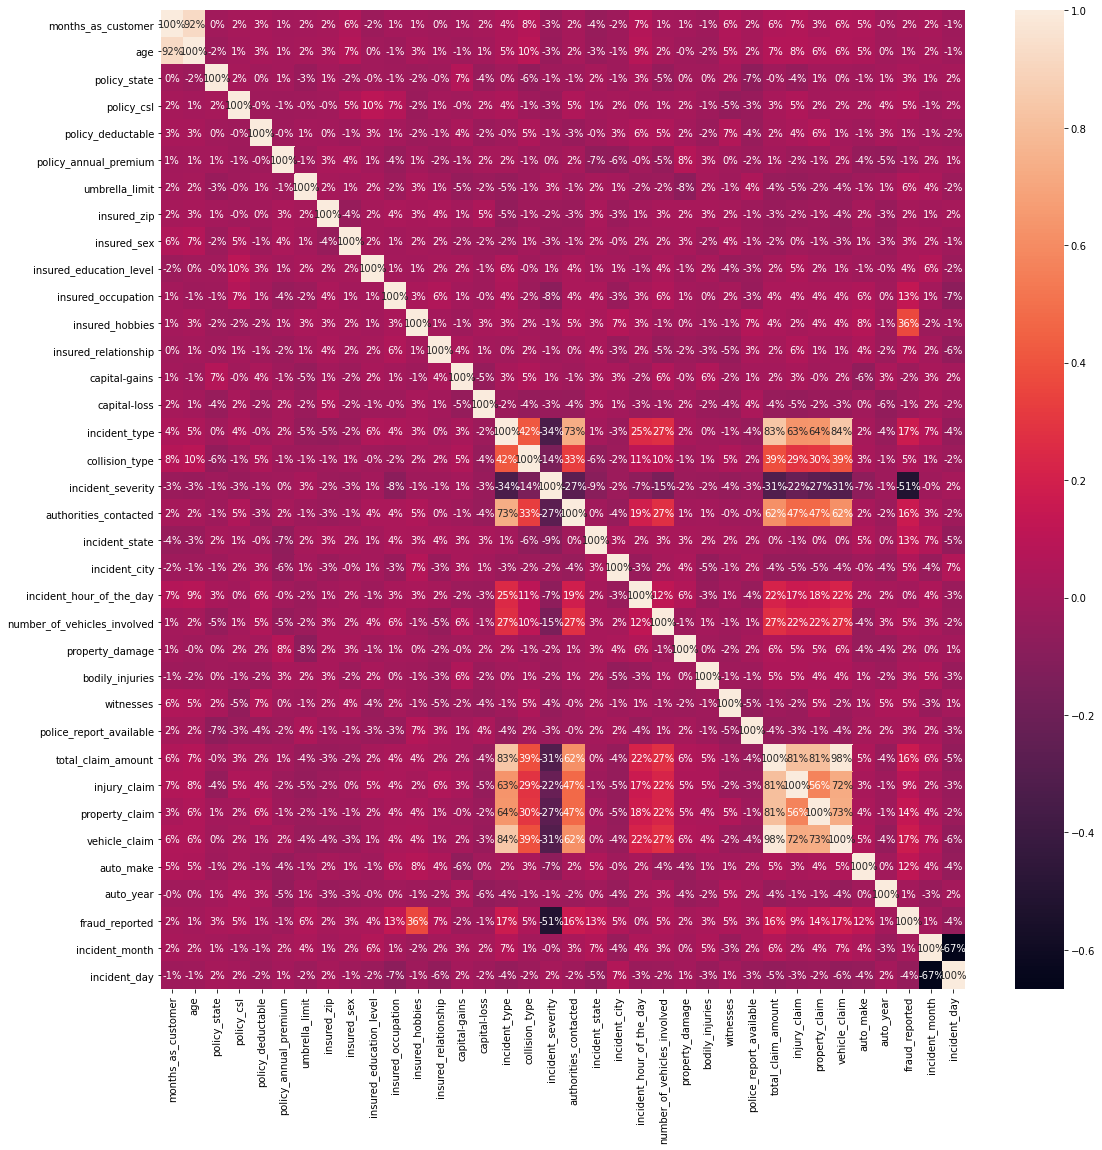

In [320]:
#Heatmap to show the correlation among the datas
plt.figure(figsize=(18,18))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [321]:
corr_matrix=df.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
insured_hobbies                0.363533
incident_type                  0.170661
vehicle_claim                  0.170049
total_claim_amount             0.163651
authorities_contacted          0.162217
property_claim                 0.137835
insured_occupation             0.132775
incident_state                 0.126848
auto_make                      0.117157
injury_claim                   0.090975
insured_relationship           0.073181
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
incident_city                  0.050957
witnesses                      0.049497
policy_csl                     0.046045
collision_type                 0.045577
insured_education_level        0.040429
bodily_injuries                0.033877
policy_state                   0.031224
insured_sex                    0.030873
police_report_available        0.027768
months_as_customer             0.020544
insured_zip                    0.019368


A very few columns are negatively correlated.

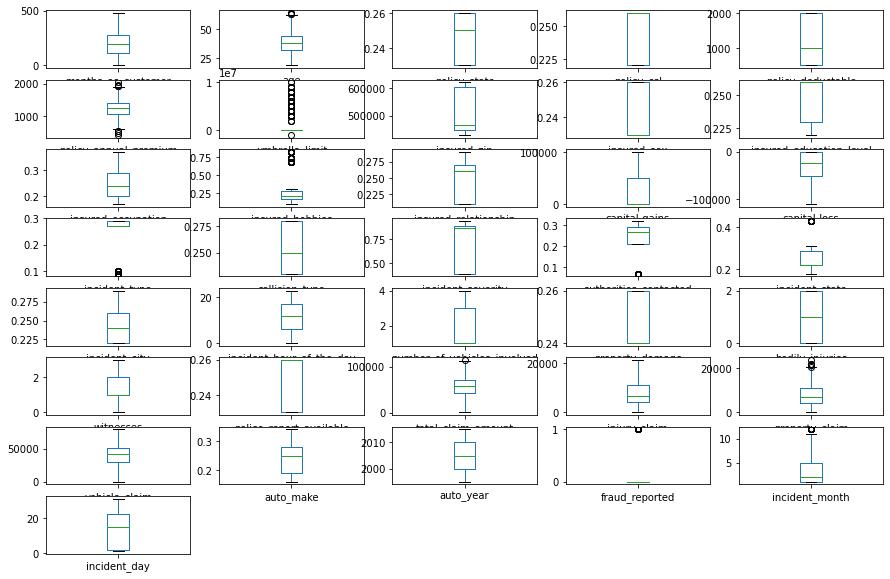

In [322]:
#Checking outliers using boxplots
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(15,10));

In [323]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                

There are some outliers present in one or two columns which we can ignore and proceed for the next step

In [324]:
#Checking the skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.378280
policy_csl                    -0.874183
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.319201
insured_occupation             0.319316
insured_hobbies                1.803228
insured_relationship           0.003942
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                 -1.626495
collision_type                 0.632780
incident_severity             -0.980276
authorities_contacted         -1.330950
incident_state                 0.851378
incident_city                  0.730218
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777


In [325]:
#Splitting the independent and target variable in x and y 
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [326]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [327]:
#Model Building

#Using multiple Algorithms for calculating the best algo which suits best for our data set
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
max_accuracy_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        acc_sc=accuracy_score(test_y,pre)
        print('accuracy score correspond to random state',r_state,'is',acc_sc)
        if acc_sc>max_accuracy_score:
            max_accuracy_score=acc_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state 40 is 0.8272727272727273
accuracy score correspond to random state 40 is 0.803030303030303
accuracy score correspond to random state 40 is 0.7424242424242424
accuracy score correspond to random state 40 is 0.7727272727272727
accuracy score correspond to random state 40 is 0.8090909090909091
accuracy score correspond to random state 41 is 0.806060606060606
accuracy score correspond to random state 41 is 0.7818181818181819
accuracy score correspond to random state 41 is 0.7878787878787878
accuracy score correspond to random state 41 is 0.7333333333333333
accuracy score correspond to random state 41 is 0.7575757575757576
accuracy score correspond to random state 42 is 0.793939393939394
accuracy score correspond to random state 42 is 0.7848484848484848
accuracy score correspond to random state 42 is 0.7606060606060606
accuracy score correspond to random state 42 is 0.7666666666666667
accuracy score correspond to random state 42 is 0.793939393939394

Above I am using for loop which helps me to provide the accuracy score at each random state and for the best state where accuracy score is maximum has come as output value.

The best model is Logistic Regression and the accuracy score is 87% to random state 69.

In [329]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=69,test_size=0.33)

In [330]:
LR=LogisticRegression()
LR.fit(train_x,train_y)
LR.score(train_x,train_y)
pred=LR.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8696969696969697
[[224  26]
 [ 17  63]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       250
           1       0.71      0.79      0.75        80

    accuracy                           0.87       330
   macro avg       0.82      0.84      0.83       330
weighted avg       0.88      0.87      0.87       330



In [331]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print(scr.mean())

0.8400000000000001


The actual accuracy of the model is 84%.

Now we will tune the hyperparameters and check if we can increase the model's accuracy.

In [338]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}       # l1 lasso l2 ridge
LR=LogisticRegression()
LR_cv=GridSearchCV(LR,grid,cv=5)
LR_cv.fit(train_x,train_y)
print("tuned hyperparameters :(best parameters) ",LR_cv.best_params_)
print("accuracy :",LR_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.826865671641791


In [339]:
LR=LogisticRegression(C=1,penalty="l2")
LR.fit(train_x,train_y)
print("score",LR.score(test_x,test_y))

score 0.8696969696969697


The accuracy now is 87% after fitting the hyperparameters in the model.

In [340]:
#Saving the model
import pickle
filename='insurance_fraud_detection_model.pkl'
pickle.dump(LR,open(filename,'wb'))